compretition [https://www.kaggle.com/c/store-sales-time-series-forecasting/overview](https://www.kaggle.com/c/store-sales-time-series-forecasting/overview)

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


In [105]:
train = pd.read_csv('./store-sales-time-series-forecasting/train.csv', index_col=['id'], parse_dates=["date"])
test = pd.read_csv('./store-sales-time-series-forecasting/test.csv', index_col=['id'])
stores = pd.read_csv('./store-sales-time-series-forecasting/stores.csv', index_col=['store_nbr'])

/home/rramos/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [106]:
stores.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


### pre proceso

In [107]:
family_names = list(train['family'].unique())
train['family'] = train['family'].astype('category')
train['store_nbr'] = train['store_nbr'].astype('category')
train[family_names] = pd.get_dummies(train['family'])
train['index'] = train.index
train['date'] = pd.to_datetime(
    train['date'],
    errors = 'coerce', 
    format = '%m/%d/%Y %H:%M:%S:%p'
)
train.drop(family_names.pop(0), axis=1, inplace=True)

In [108]:
pd.merge(train, stores, how='left', left_on='store_nbr', right_index=True)

,date,store_nbr,family,sales,onpromotion,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,...,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,index,city,state,type,cluster
id,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,1,0,0,0,0,...,0,0,0,0,0,1,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,0,1,0,0,0,...,0,0,0,0,0,2,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,0,0,1,0,0,...,0,0,0,0,0,3,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,0,0,0,1,0,...,0,0,0,0,0,4,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,0,0,0,0,0,...,1,0,0,0,0,3000883,Quito,Pichincha,B,6
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,0,0,0,0,0,...,0,1,0,0,0,3000884,Quito,Pichincha,B,6
3000885,2017-08-15,9,PRODUCE,2419.729,148,0,0,0,0,0,...,0,0,1,0,0,3000885,Quito,Pichincha,B,6


In [109]:
train =  train[train['BEAUTY']==1][train['store_nbr']==1]
# train =  train.tail(50000)
train['lag_1'] = train['sales'].shift(1)
train = train.dropna()

/tmp/ipykernel_9190/3092602662.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train =  train[train['BEAUTY']==1][train['store_nbr']==1]


In [110]:
train = train.convert_dtypes()
# train[train['onpromotion']>0].head(20)
train.head(20)

,date,store_nbr,family,sales,onpromotion,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,...,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,index,lag_1
id,,,,,,,,,,,,,,,,,,,,,
1784,2013-01-02,1,BEAUTY,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1784,0
3566,2013-01-03,1,BEAUTY,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3566,2
5348,2013-01-04,1,BEAUTY,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5348,0
7130,2013-01-05,1,BEAUTY,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7130,3
8912,2013-01-06,1,BEAUTY,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,8912,3
10694,2013-01-07,1,BEAUTY,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,10694,0
12476,2013-01-08,1,BEAUTY,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,12476,1
14258,2013-01-09,1,BEAUTY,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,14258,3
16040,2013-01-10,1,BEAUTY,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,16040,1


In [111]:
df = train.copy(deep=True)
df['sales']= df['sales'].astype(np.float64)
df['lag_1'] = df['lag_1'].astype(np.float64)
df = df.reindex(columns=['sales', 'lag_1'])

df.dtypes

sales    float64
lag_1    float64
dtype: object

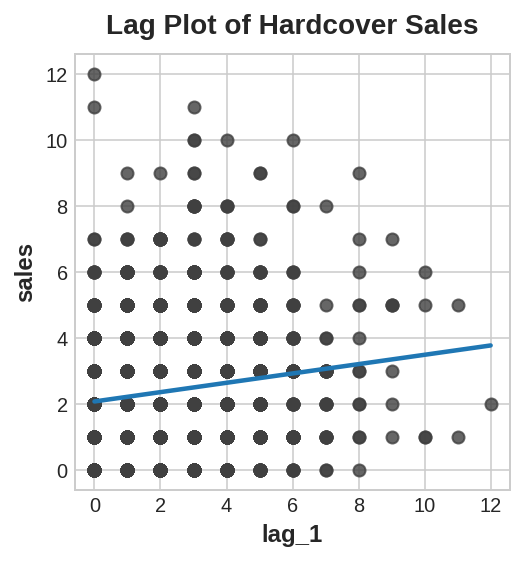

In [112]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

In [113]:

X = df.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

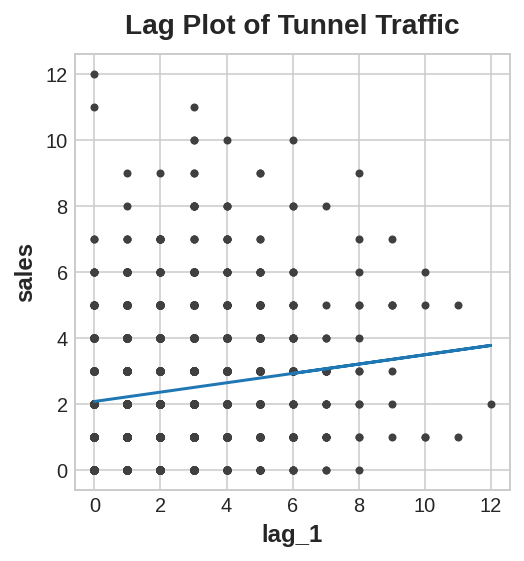

In [114]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('sales')
ax.set_xlabel('lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

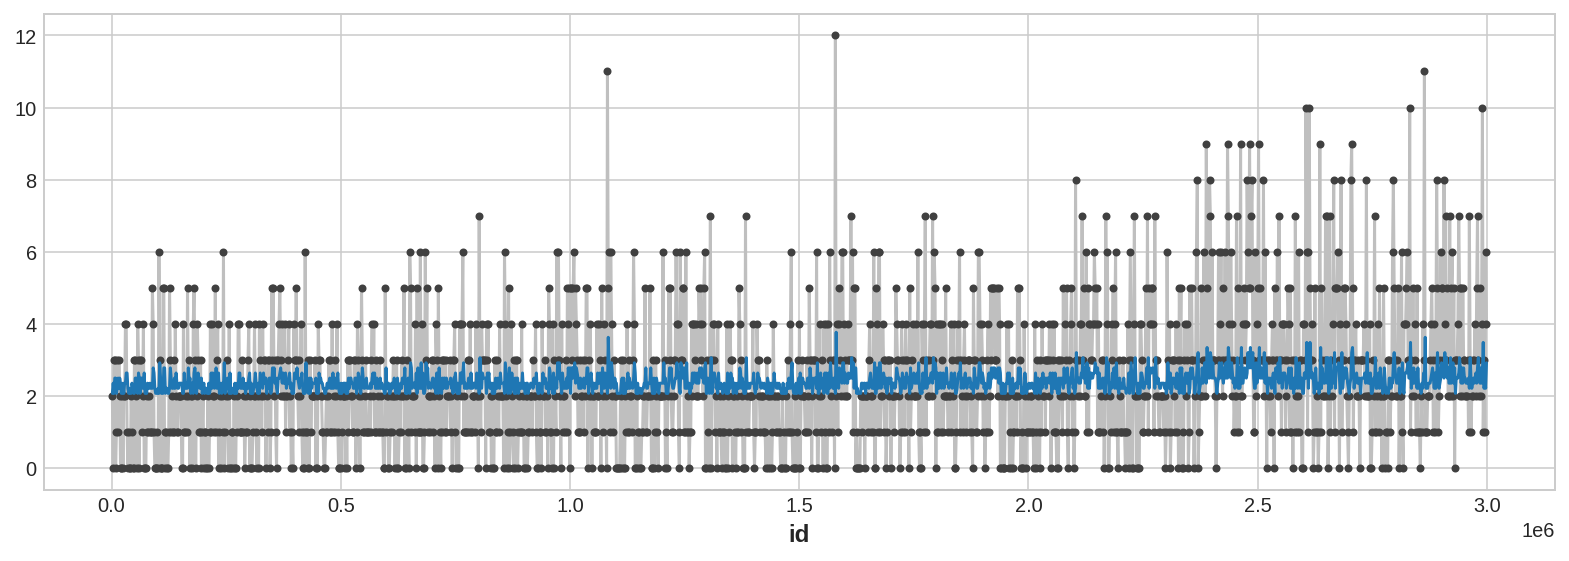

In [115]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [116]:
y_pred

id
1784       2.069560
3566       2.352349
5348       2.069560
7130       2.493743
8912       2.493743
             ...   
2991980    3.483504
2993762    2.210955
2995544    2.493743
2997326    2.210955
2999108    2.917926
Length: 1683, dtype: float64

In [117]:
print(train.describe())
print(train.groupby('date').mean()['sales'].describe())

             sales  onpromotion  BABY CARE  BEAUTY  BEVERAGES   BOOKS  \
count  1683.000000  1683.000000     1683.0  1683.0     1683.0  1683.0   
mean      2.409982     0.134284        0.0     1.0        0.0     0.0   
std       1.898606     0.353050        0.0     0.0        0.0     0.0   
min       0.000000     0.000000        0.0     1.0        0.0     0.0   
25%       1.000000     0.000000        0.0     1.0        0.0     0.0   
50%       2.000000     0.000000        0.0     1.0        0.0     0.0   
75%       3.000000     0.000000        0.0     1.0        0.0     0.0   
max      12.000000     2.000000        0.0     1.0        0.0     0.0   

       BREAD/BAKERY  CELEBRATION  CLEANING   DAIRY  ...  PERSONAL CARE  \
count        1683.0       1683.0    1683.0  1683.0  ...         1683.0   
mean            0.0          0.0       0.0     0.0  ...            0.0   
std             0.0          0.0       0.0     0.0  ...            0.0   
min             0.0          0.0       0.0    

<AxesSubplot:xlabel='date'>

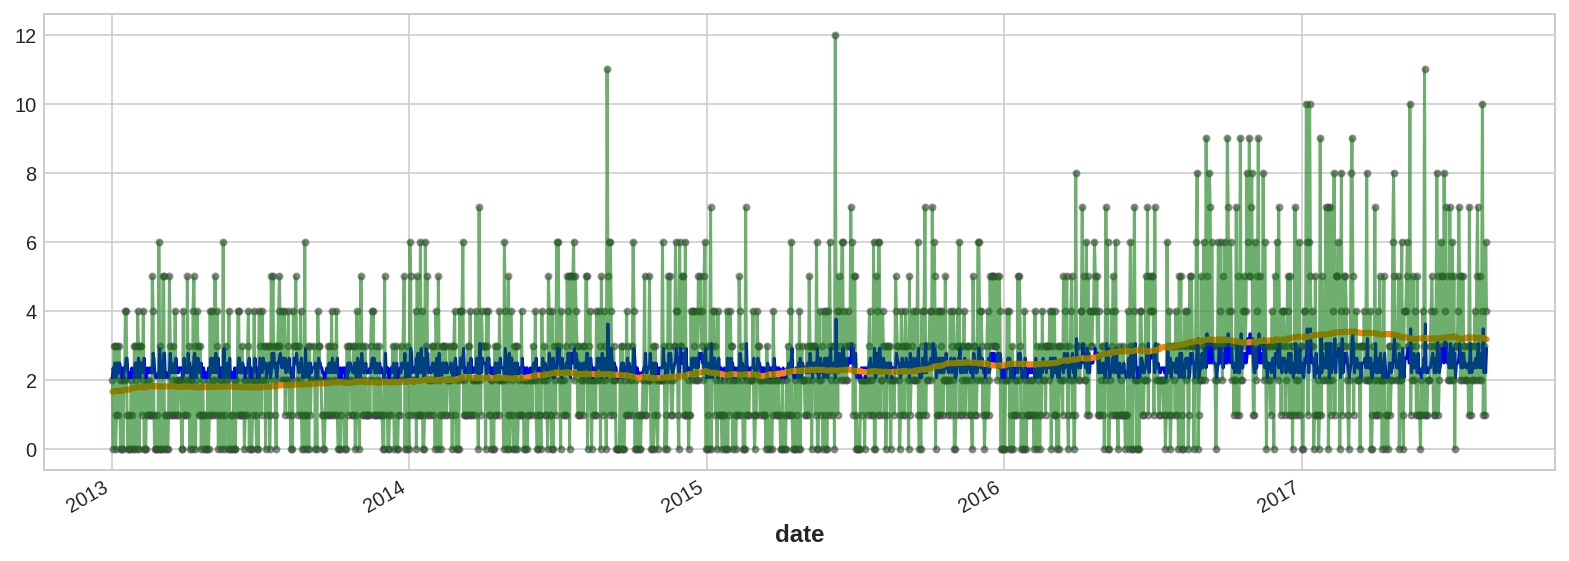

In [118]:
average_sales = train.groupby('date').mean()['sales']
trend = average_sales.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = average_sales.plot(**plot_params, alpha=0.5)
y_pred.index = trend.index
y_pred.plot(ax=ax, color='b')


z_pred = pd.Series(y - average_sales, index=trend.index)
z_pred.plot(ax=ax, alpha=0.7)

ax = trend.plot(ax=ax, linewidth=3)
y.index = trend.index
y.plot(ax=ax, alpha=0.5, color='g')

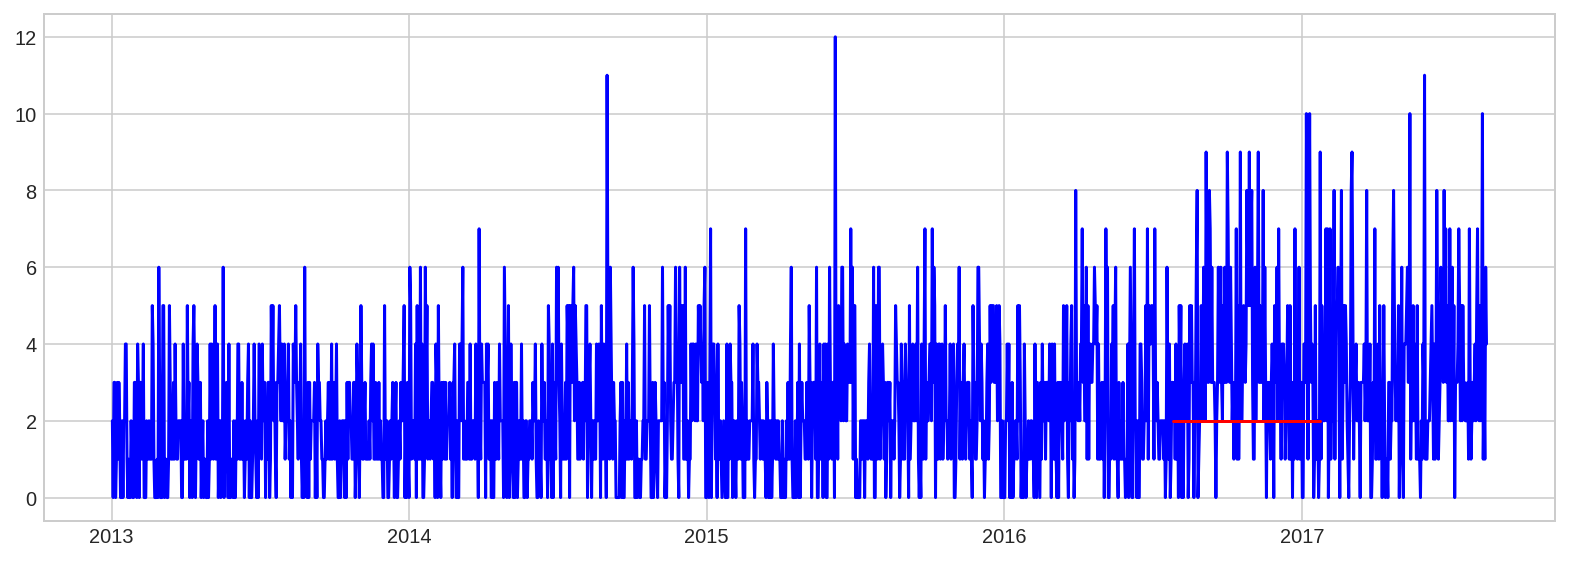

In [119]:
plt.plot(list(train['date'].values), list(train['sales'].values), 'b')
plt.plot(list(train[train['onpromotion']>1]['date'].values), list(train[train['onpromotion']>1]['onpromotion'].values), 'r')


In [120]:
from sklearn.linear_model import LinearRegression
# Training data
X = train.loc[:, [*family_names, 'lag_1']] # features
y = train.loc[:, 'sales']  # target
 
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [121]:
train[['index', 'sales', 'lag_1']]

,index,sales,lag_1
id,,,
1784,1784,2,0
3566,3566,0,2
5348,5348,3,0
7130,7130,3,3
8912,8912,0,3
...,...,...,...
2991980,2991980,1,10
2993762,2993762,3,1
2995544,2995544,1,3


In [122]:
y_pred = model.predict(X)


In [123]:
train[['date', 'sales']]

,date,sales
id,,
1784,2013-01-02,2
3566,2013-01-03,0
5348,2013-01-04,3
7130,2013-01-05,3
8912,2013-01-06,0
...,...,...
2991980,2017-08-11,1
2993762,2017-08-12,3
2995544,2017-08-13,1


In [124]:
train['date']

id
1784      2013-01-02
3566      2013-01-03
5348      2013-01-04
7130      2013-01-05
8912      2013-01-06
             ...    
2991980   2017-08-11
2993762   2017-08-12
2995544   2017-08-13
2997326   2017-08-14
2999108   2017-08-15
Name: date, Length: 1683, dtype: datetime64[ns]

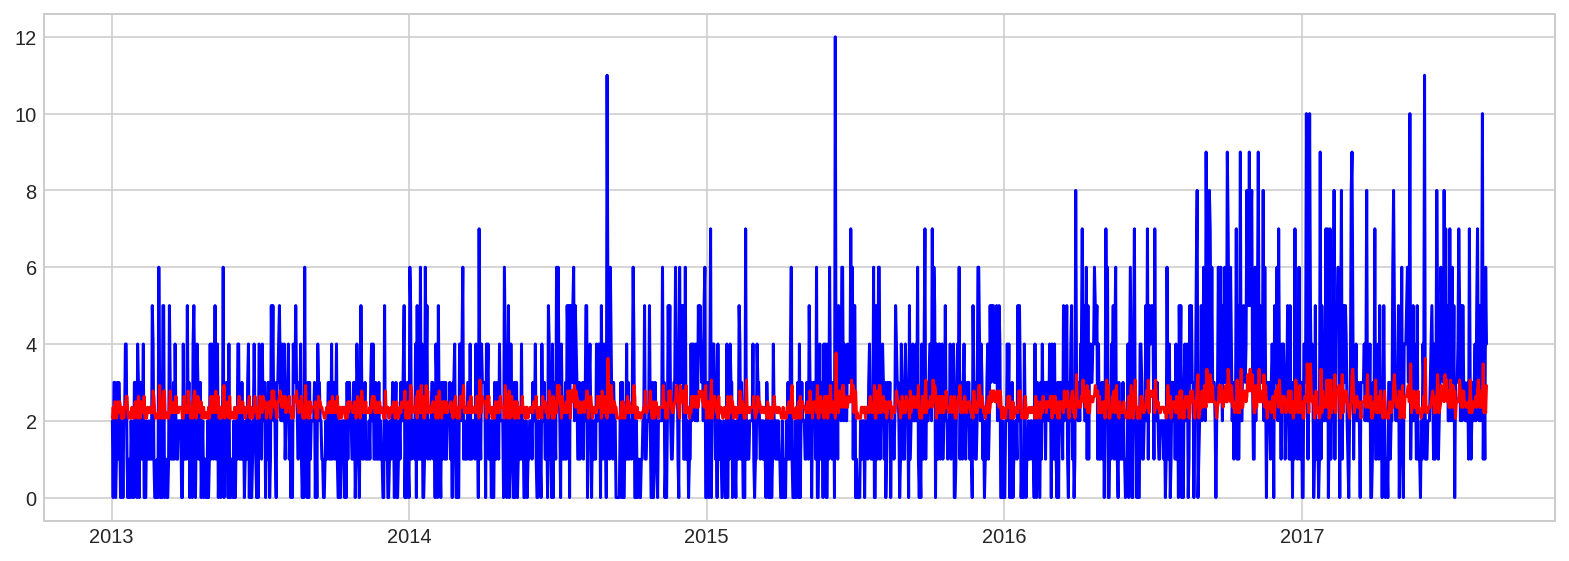

In [125]:
import matplotlib.pyplot as plt

# plt.plot(X['index'])
plt.plot(list(train['date'].values), list(train['sales']), 'b')
plt.plot(list(train['date'].values), y_pred.tolist(), 'r')
# plt.plot(list(train['date'].head(100).values), list(train['sales'].head(100)), 'b')
# plt.plot(list(train['date'].head(100).values), list(y_pred.head(100).values), 'r')


# train[train['BEAUTY']==1].plot('index', 'sales', 'b')
plt.show()

ValueError: Unrecognized character a in format string

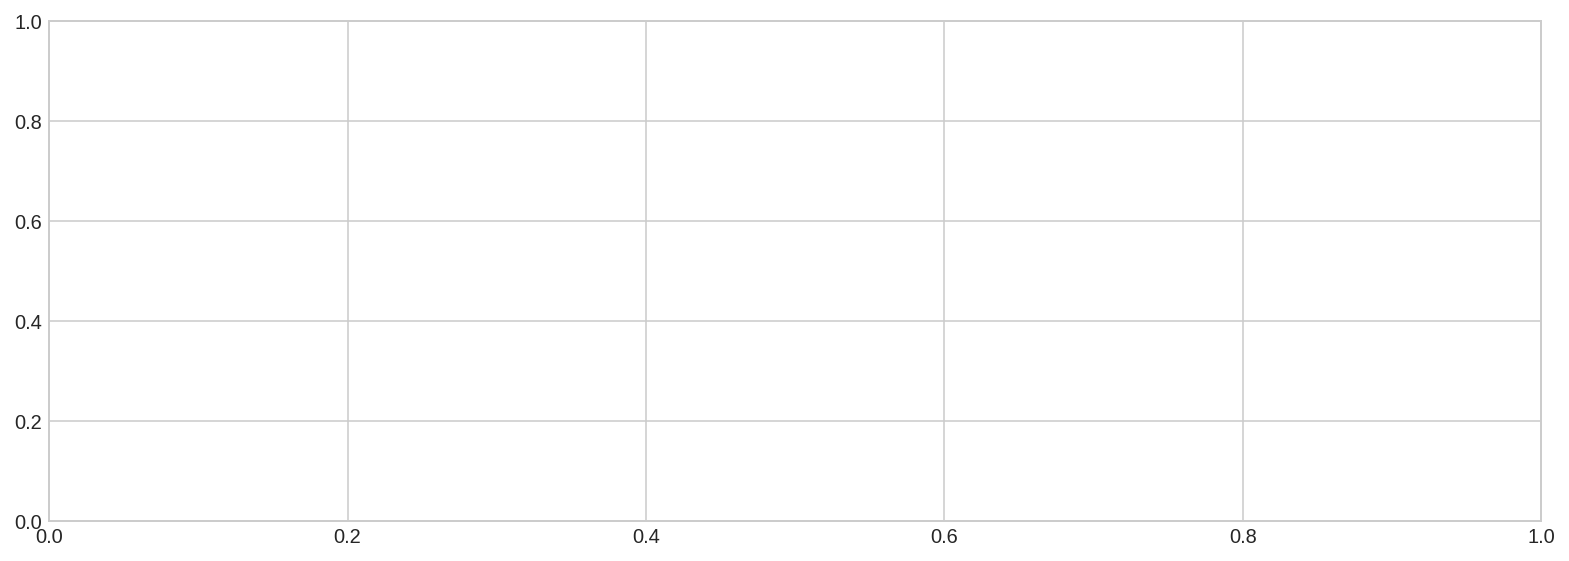

In [126]:
fig, ax = plt.subplots()
# ax.plot('index', 'sales', data=train, color='0.75')
ax.plot('index', 'sales', color='0.75')
# ax = sns.regplot(x='index', y='sales', data=train, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('time Plot of Hardcover Sales');

In [ ]:
train.describe()

,store_nbr,sales,onpromotion,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,...,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,index,lag_1
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000
mean,27.459669,469.803688,6.310706,0.030301,0.030301,0.030301,0.030301,0.030301,0.030301,0.030301,...,0.030301,0.030301,0.030301,0.030301,0.030321,0.030321,0.030321,0.030321,2.975888e+06,469.812273
std,15.595214,1270.242102,17.150029,0.171415,0.171415,0.171415,0.171415,0.171415,0.171415,0.171415,...,0.171415,0.171415,0.171415,0.171415,0.171470,0.171470,0.171470,0.171470,1.443361e+04,1270.240485
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.950889e+06,0.000000
25%,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.963388e+06,4.000000
50%,27.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.975888e+06,29.000000
75%,41.000000,276.787500,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.988388e+06,276.826500
max,54.000000,18340.000000,519.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000887e+06,18340.000000


In [ ]:
train.tail(100)

,date,store_nbr,family,sales,onpromotion,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,...,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,index,lag_1
id,,,,,,,,,,,,,,,,,,,,,
3000788,2017-08-15,6,SEAFOOD,47.575,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3000788,0.0
3000789,2017-08-15,7,AUTOMOTIVE,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3000789,47.575
3000790,2017-08-15,7,BABY CARE,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3000790,5.0
3000791,2017-08-15,7,BEAUTY,11.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3000791,0.0
3000792,2017-08-15,7,BEVERAGES,3999.0,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3000792,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3000883,6.0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3000884,438.133
3000885,2017-08-15,9,PRODUCE,2419.729,148,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3000885,154.553
